In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
namesngenre = np.load('./dataset/namesngenre.npy')

In [3]:
namesngenre

array([['Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       ['Jumanji (1995)', 'Adventure|Children|Fantasy'],
       ['Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       ['Elsa & Fred (2005)', 'Comedy|Drama|Romance'],
       ['Tomb Raider (2018)', 'Action|Adventure|Fantasy'],
       ['Fred Armisen: Standup for Drummers (2018)', 'Comedy']],
      dtype='<U158')

In [4]:
ratings_train = np.load('./dataset/ratings_train.npy')

In [5]:
ratings_train.shape

(610, 4980)

In [6]:
ratings_train

array([[ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan,  2., nan, ..., nan, nan, nan],
       [ 3., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [7]:
np.nanmax(ratings_train)

5.0

In [40]:
import MF2
import importlib

# Reload a specific module
importlib.reload(MF2)

<module 'MF2' from 'c:\\Users\\User\\Documents\\Estudos\\M2 Dauphine\\Data Science Lab\\collaborativer_filter_user_recommendation\\collaborative_filter\\MF2.py'>

In [41]:
k = 1

factorization = MF2.MF(ratings_train, l=0.01, mu=0.01, k=k)

In [42]:
num_iterations = 1000
factorization.fit(lr_I=0.0001, lr_U=0.0001, num_iterations=num_iterations)
prediction = factorization.predict()

rounded_predictions = np.round(prediction*2)/2

print(rounded_predictions)

print(f"RMSE after rounding: {factorization.RMSE_(rounded_predictions)}")
print(f"Accuracy after rounding: {factorization.accuracy(rounded_predictions)}")


Iteration 1: Cost = 32394.072196557947. RMSE = 1.0094344976294964
Iteration 2: Cost = 31380.582833671924. RMSE = 0.9934196972917054
Iteration 3: Cost = 30619.83672408397. RMSE = 0.9812267000687258
Iteration 4: Cost = 30011.450138647917. RMSE = 0.9713653518022869
Iteration 5: Cost = 29505.28922841121. RMSE = 0.9630838908785138
Iteration 6: Cost = 29073.037611450418. RMSE = 0.9559547791583844
Iteration 7: Cost = 28696.998496225762. RMSE = 0.9497091618746231
Iteration 8: Cost = 28365.246229113305. RMSE = 0.9441647308915004
Iteration 9: Cost = 28069.29721750157. RMSE = 0.9391909858634658
Iteration 10: Cost = 27802.87296714846. RMSE = 0.9346907551178535
Iteration 11: Cost = 27561.18453020061. RMSE = 0.9305894824210105
Iteration 12: Cost = 27340.490135586446. RMSE = 0.9268285839662388
Iteration 13: Cost = 27137.80773351948. RMSE = 0.9233611168825836
Iteration 14: Cost = 26950.720976854056. RMSE = 0.9201488454833492
Iteration 15: Cost = 26777.244229944987. RMSE = 0.9171601932019611
Iteration 

In [18]:
# Plot the RMSE values for train and test datasets
epochs = np.arange(1, num_iterations + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, factorization.RMSE_train_hist, label='Train RMSE', marker='o', linestyle='-')
plt.plot(epochs, factorization.RMSE_test_hist, label='Test RMSE', marker='o', linestyle='-')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE vs. Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

AttributeError: 'MF' object has no attribute 'RMSE_train_hist'

<Figure size 800x600 with 0 Axes>

Obs.: The cost function may be leading to mistakes since it's taking into account the sparse values.

In [19]:
prediction_full = factorization.predict()

In [13]:
'''
import time
import logging
from MF import MatrixFactorizarion 

# Initialize logging
logging.basicConfig(filename='mf_experiment.log', level=logging.INFO, format='%(asctime)s - %(message)s')

k_values = [1, 5, 10]

rmse_values = []
rmse_history = []

for k in k_values:
    start_time = time.time() 
    MF = MatrixFactorizarion(ratings_train, l=0.01, mu=0.01, k=k)
    MF.fit(lr_I=0.0001, lr_U=0.0001, num_iterations=10)
    
    prediction_full = MF.predict()
    prediction = prediction_full[row_indices, col_indices]
    
    rmse = MF.RMSE(prediction, R_non_nan)
    rmse_values.append(rmse)

    elapsed_time = time.time() - start_time
    
    # Log the results
    log_message = f'k={k}, RMSE={rmse}, Time={elapsed_time:.2f} seconds'
    logging.info(log_message)

# Plot RMSE evolution as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('Number of Factors (k)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Factors (k)')
plt.grid(True)
plt.show()
'''

"\nimport time\nimport logging\nfrom MF import MatrixFactorizarion \n\n# Initialize logging\nlogging.basicConfig(filename='mf_experiment.log', level=logging.INFO, format='%(asctime)s - %(message)s')\n\nk_values = [1, 5, 10]\n\nrmse_values = []\nrmse_history = []\n\nfor k in k_values:\n    start_time = time.time() \n    MF = MatrixFactorizarion(ratings_train, l=0.01, mu=0.01, k=k)\n    MF.fit(lr_I=0.0001, lr_U=0.0001, num_iterations=10)\n    \n    prediction_full = MF.predict()\n    prediction = prediction_full[row_indices, col_indices]\n    \n    rmse = MF.RMSE(prediction, R_non_nan)\n    rmse_values.append(rmse)\n\n    elapsed_time = time.time() - start_time\n    \n    # Log the results\n    log_message = f'k={k}, RMSE={rmse}, Time={elapsed_time:.2f} seconds'\n    logging.info(log_message)\n\n# Plot RMSE evolution as a function of k\nplt.figure(figsize=(10, 6))\nplt.plot(k_values, rmse_values, marker='o', linestyle='-')\nplt.xlabel('Number of Factors (k)')\nplt.ylabel('RMSE')\nplt.tit

## Result analysis

__Attention:__ Here we pick only the non nan values, which returns a 1-D array. Then we reshape a part of them so we can see it as a image and visually comapre the results.

In [14]:
non_nan_indices = np.where(~np.isnan(ratings_train))
# Separate the row and column indices
row_indices, col_indices = non_nan_indices
R_non_nan = MF2.R[row_indices, col_indices]
normalized_ratings = (R_non_nan - np.min(R_non_nan)) / (np.max(R_non_nan) - np.min(R_non_nan))
normalized_ratings = normalized_ratings[:normalized_ratings.shape[0]//1000 * 1000].reshape(200, -1)

# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(normalized_ratings, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference

# Show the heatmap
plt.title('Normalized ratings')
plt.show()


AttributeError: module 'MF' has no attribute 'R'

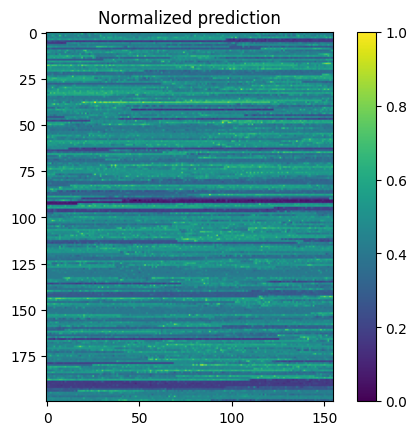

In [ ]:
# Separate the row and column indices
row_indices, col_indices = non_nan_indices

# Access the corresponding values in the second matrix
prediction = prediction_full[row_indices, col_indices]
normalized_prediction = (prediction - np.min(prediction)) / (np.max(prediction) - np.min(prediction))
normalized_prediction = normalized_prediction[:normalized_prediction.shape[0]//1000 * 1000].reshape(200, -1)
# Create a heatmap using a colormap (e.g., 'viridis')
plt.imshow(normalized_prediction, cmap='viridis')
plt.colorbar()  # Add a colorbar for reference

# Show the heatmap
plt.title('Normalized prediction')
plt.show()

In [ ]:

MF.RMSE(prediction, R_non_nan)

0.90477980279857